# <center> **DESCRIPTION**</center>

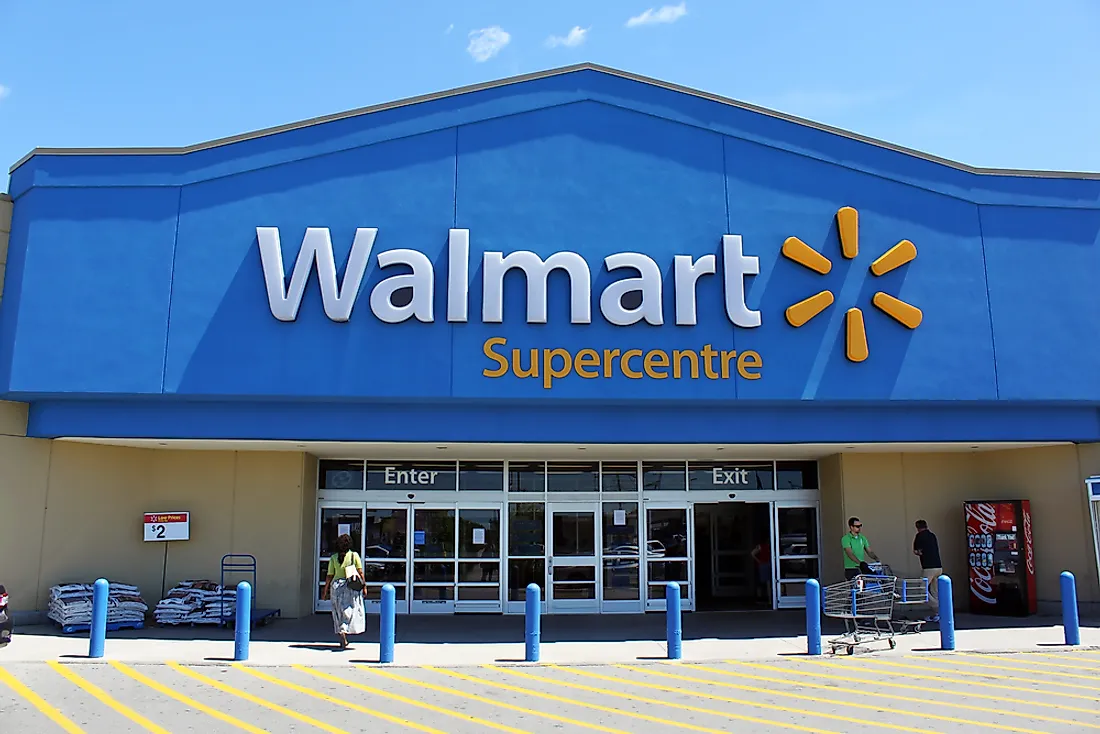


One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

## **importing necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
data_frame = pd.read_csv("Walmart_Store_sales.csv")

In [4]:
data_frame.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# **Dataset Description**

*  **Store** = the store number

*  **Date** = the week of sales

*  **Weekly_Sales** =  sales for the given store

*  **Holiday_Flag** = whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

*  **Temperature** = Temperature on the day of sale

*  **Fuel_Price** = Cost of fuel in the region

*  **CPI** =  Current consumer price index

*  **Unemployment** =  Current unemployment rate





In [5]:
data_frame.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
data_frame.shape

(6435, 8)

In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### **Checking if dataframe has anytype of null/duplicate values**

In [8]:
data_frame.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
data_frame.duplicated().sum()

0

## **Changing Data format in "Date" Column to understandable format**

In [10]:
data_frame["month"] = 0
data_frame["year"] = 0
for i in range(len(data_frame["Date"])):
    f_date = data_frame["Date"][i].split("-")
    data_frame["Date"][i] = int(f_date[0])
    data_frame["month"][i] = int(f_date[1])
    data_frame["year"][i] = int(f_date[2])

In [11]:
data_frame.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
0,1,5,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,5,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010


# Adding new holiday events column 


### **Holiday Events**

- Super Bowl:   12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labour Day:   10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving:  26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas:   31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [12]:



data_frame.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
month             int64
year              int64
dtype: object

In [13]:
data_frame["Date"] = pd.to_numeric(data_frame["Date"])

In [14]:
data_frame["holiday_event"] = 1

In [15]:
Super_Bowl  = {12,11,10,8}
Labour_Day= {10,9,7,6}
Thanksgiving= {26,25,23,29}
Christmas= {31,30,28,27}
for i in range(len(data_frame["Date"])):
    if (data_frame["Date"][i] in Super_Bowl) and (data_frame["month"][i] == 2):
         data_frame["holiday_event"][i] = "Super Bowl"
    elif (data_frame["Date"][i] in Labour_Day) and (data_frame["month"][i] == 9):
         data_frame["holiday_event"][i] = "Labour Day"
    elif (data_frame["Date"][i] in Thanksgiving) and (data_frame["month"][i] == 11):
         data_frame["holiday_event"][i] = "Thanksgiving"
    elif (data_frame["Date"][i] in Christmas) and (data_frame["month"][i] == 12):
         data_frame["holiday_event"][i] = "Christmas" 
    else:
         data_frame["holiday_event"][i] = "no event"                 

In [16]:
data_frame.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,holiday_event
0,1,5,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,no event
1,1,12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,Super Bowl
2,1,19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,no event
3,1,26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,no event
4,1,5,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,no event


## <h1>**Which store has maximum sales?**</h1>

Text(0, 0.5, 'Weekly Sales')

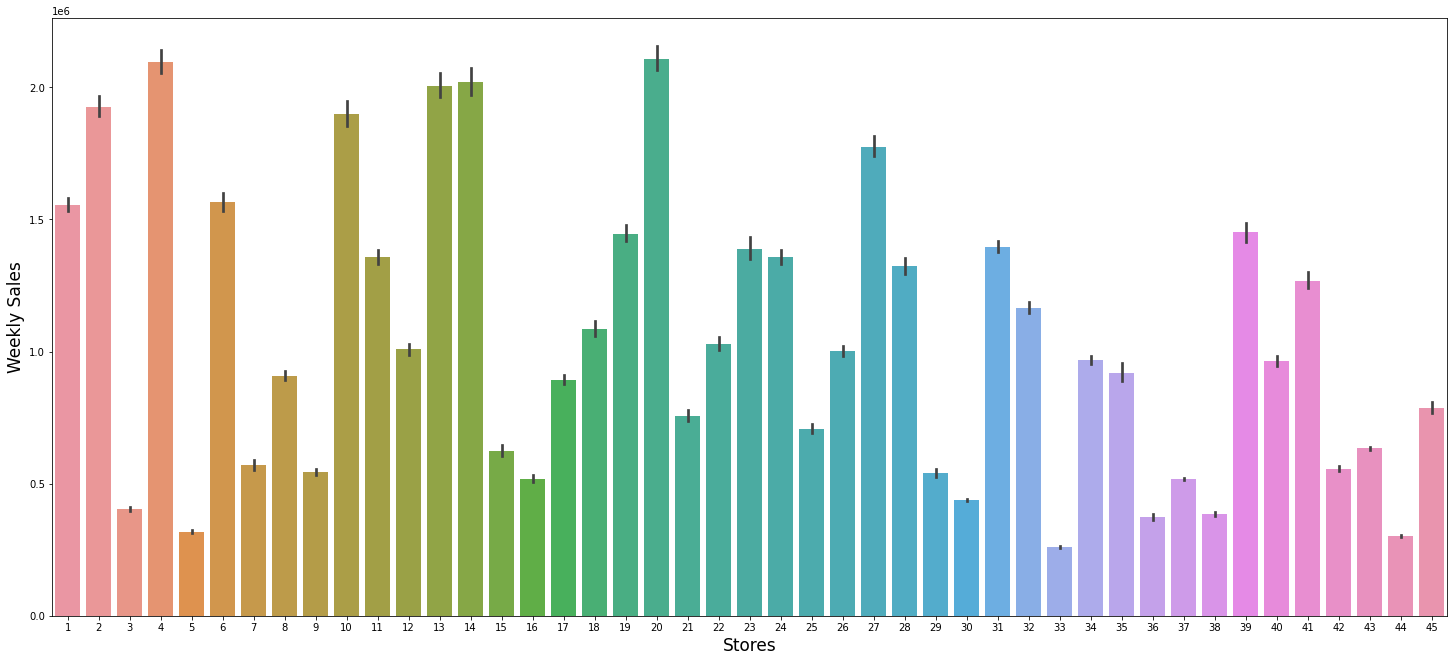

In [17]:
plt.figure(figsize=(25,11))
sns.barplot(data = data_frame,x="Store",y="Weekly_Sales")
plt.xlabel("Stores",fontsize=17)
plt.ylabel("Weekly Sales",fontsize=17)

- So above we can see that Store "4" and "20" have high amount of weekly sales.

- For now lets find out which store have maximum sales between both of them.

In [18]:
group_data =  data_frame.groupby("Store",axis=0)

In [19]:
store_4 = group_data.get_group(4)
store_4.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,holiday_event
429,4,5,2135143.87,0,43.76,2.598,126.442065,8.623,2,2010,no event
430,4,12,2188307.39,1,28.84,2.573,126.496258,8.623,2,2010,Super Bowl
431,4,19,2049860.26,0,36.45,2.540,126.526286,8.623,2,2010,no event
432,4,26,1925728.84,0,41.36,2.590,126.552286,8.623,2,2010,no event
433,4,5,1971057.44,0,43.49,2.654,126.578286,8.623,3,2010,no event


In [20]:
store4_total_sales = sum(store_4["Weekly_Sales"])
round(store4_total_sales,2)

299543953.38

In [21]:
store_20 = group_data.get_group(20)
store_20.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,holiday_event
2717,20,5,2401395.47,0,25.92,2.784,204.247194,8.187,2,2010,no event
2718,20,12,2109107.90,1,22.12,2.773,204.385747,8.187,2,2010,Super Bowl
2719,20,19,2161549.76,0,25.43,2.745,204.432100,8.187,2,2010,no event
2720,20,26,1898193.95,0,32.32,2.754,204.463087,8.187,2,2010,no event
2721,20,5,2119213.72,0,31.75,2.777,204.494073,8.187,3,2010,no event


In [22]:
store20_total_sales = sum(store_20["Weekly_Sales"])
round(store20_total_sales,2)

301397792.46

 So the Maximum sales that store has is **"301397792.46"** by the **Store 20**

## **Which store has maximum standard deviation**

In [23]:
print(data_frame.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False).index[0])

14


## **Which store/s has good quarterly growth rate in Q3’2012**

In [24]:
q3_store = data_frame[(data_frame["year"] == 2012)]
q3_store = data_frame[(data_frame["month"] == 7) | (data_frame["month"] == 8) | (data_frame["month"] == 9)]

Text(0, 0.5, 'Weekly Sales')

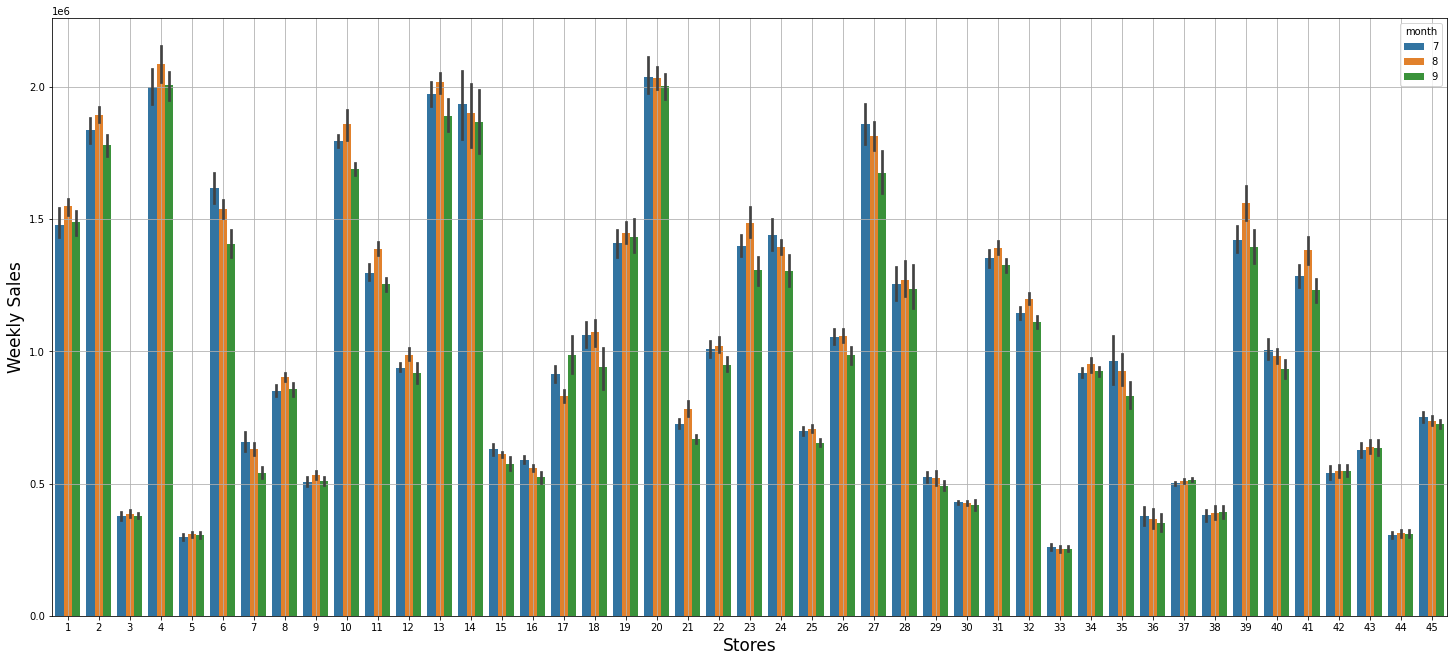

In [25]:
plt.figure(figsize=(25,11))
sns.barplot(data = q3_store,x="Store",y="Weekly_Sales",hue="month")
plt.grid()
plt.xlabel("Stores",fontsize=17)
plt.ylabel("Weekly Sales",fontsize=17)

- So above we can see that again Store "4" and "20" have high amount of weekly sales in **Q3 2012**.

- For now lets find out which store have maximum sales between both of them.

In [26]:
Q3_store_4 = q3_store[q3_store["Store"]==4]
print(sum(Q3_store_4["Weekly_Sales"]))

81194592.89


In [27]:
Q3_store_20 = q3_store[q3_store["Store"]==20]
print(sum(Q3_store_20["Weekly_Sales"]))

81004897.67000002


 store has good quarterly growth rate in Q3’2012 is **store 4**

##**holidays which have higher sales than the mean sales in non-holiday season for all stores together**

In [28]:
non_holiday_data = data_frame[data_frame["Holiday_Flag"] == 0]
non_holiday_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,holiday_event
0,1,5,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,no event
2,1,19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,no event
3,1,26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,no event
4,1,5,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,no event
5,1,12,1439541.59,0,57.79,2.667,211.380643,8.106,3,2010,no event


Text(0.5, 1.0, 'Sales on Non-Holiday Days')

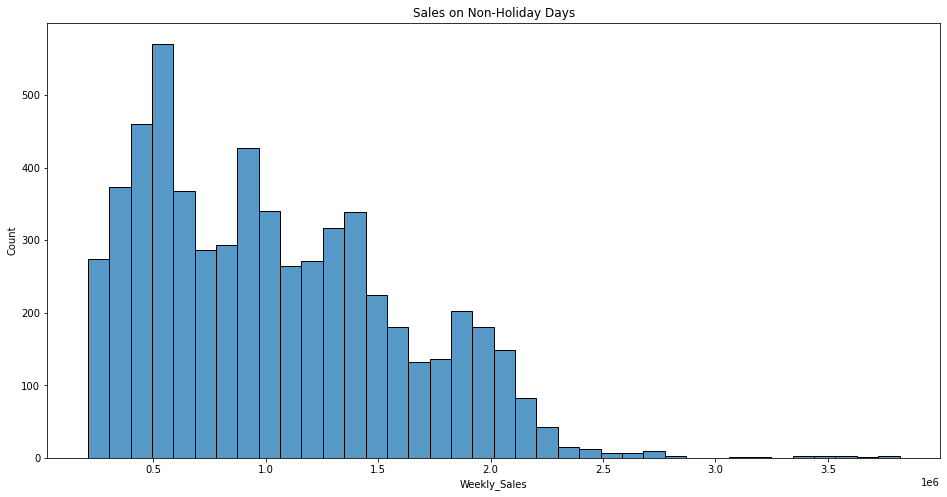

In [29]:
plt.figure(figsize=(16,8))
sns.histplot(non_holiday_data["Weekly_Sales"])
plt.title("Sales on Non-Holiday Days")

In [30]:
holiday_data = data_frame[data_frame["Holiday_Flag"] == 1]
holiday_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,holiday_event
1,1,12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,Super Bowl
31,1,10,1507460.69,1,78.69,2.565,211.495190,7.787,9,2010,Labour Day
42,1,26,1955624.11,1,64.52,2.735,211.748433,7.838,11,2010,Thanksgiving
47,1,31,1367320.01,1,48.43,2.943,211.404932,7.838,12,2010,Christmas
53,1,11,1649614.93,1,36.39,3.022,212.936705,7.742,2,2011,Super Bowl


Text(0.5, 1.0, 'Sales on Holiday Days')

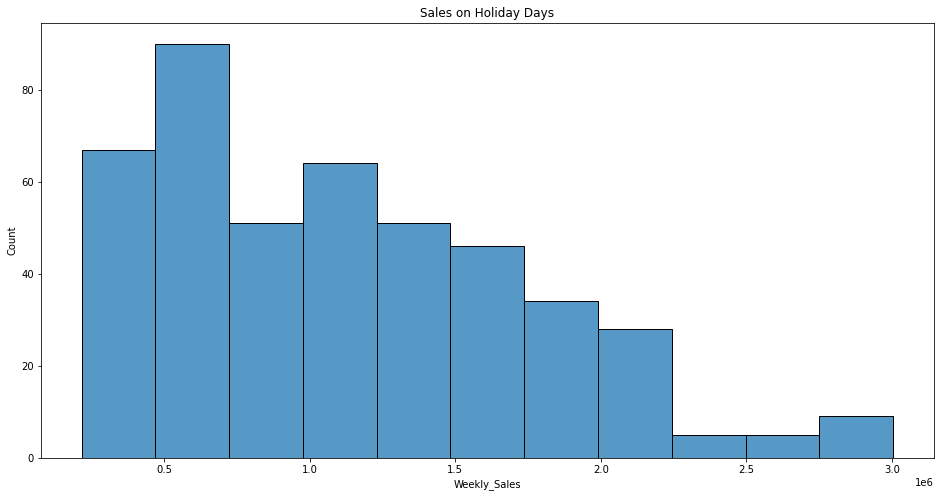

In [31]:
plt.figure(figsize=(16,8))
sns.histplot(holiday_data["Weekly_Sales"])
plt.title("Sales on Holiday Days")

In [32]:
print(round(non_holiday_data["Weekly_Sales"].mean()))

1041256


In [33]:
holiday_data = holiday_data[holiday_data["Weekly_Sales"] >non_holiday_data["Weekly_Sales"].mean() ]

<AxesSubplot:xlabel='holiday_event', ylabel='Weekly_Sales'>

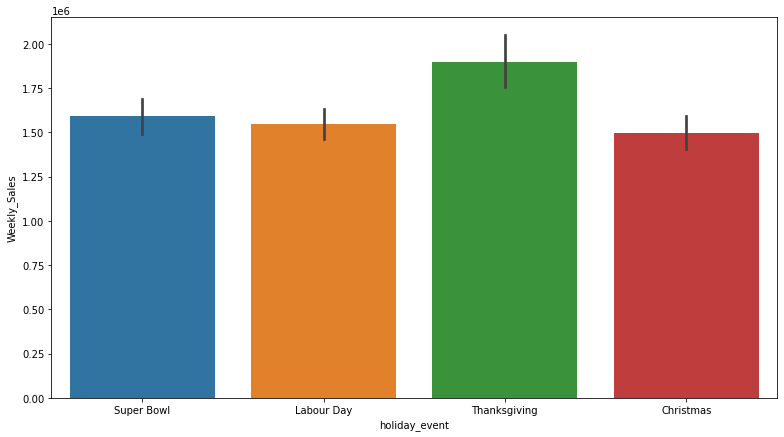

In [34]:
plt.figure(figsize=(13,7))
sns.barplot(data = holiday_data,x="holiday_event",y="Weekly_Sales")

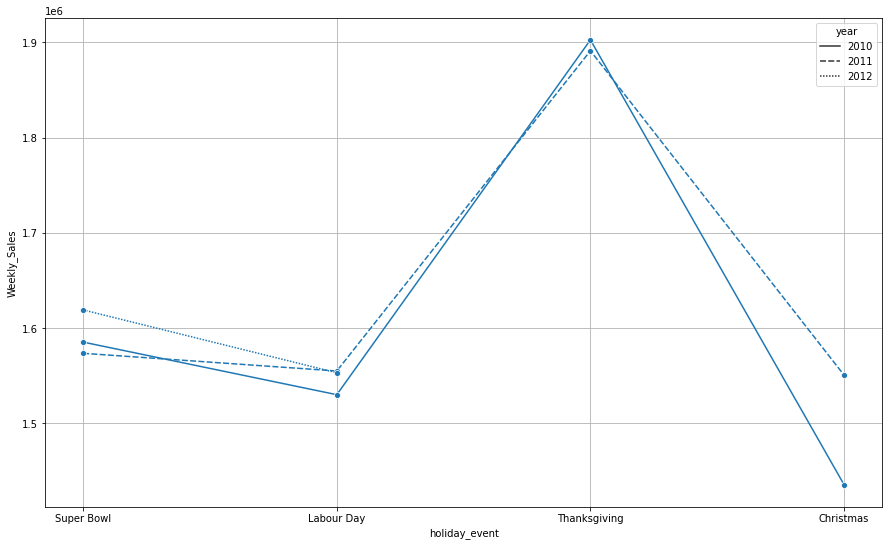

In [35]:
plt.figure(figsize=(15,9))
sns.lineplot(x=holiday_data["holiday_event"],y=holiday_data["Weekly_Sales"],style=holiday_data["year"],ci=None,marker="o")
plt.grid()

**"Thanksgiving"** holidays which have higher sales than the mean sales in non-holiday season for all stores together.

## **monthly and semester view of sales in units and give insights**

In [36]:
pivot_data = data_frame.pivot_table("Weekly_Sales","month","year")
pivot_data.head()

year,2010,2011,2012
month,,,
1,NaN,9.094665e+05,9.383026e+05
2,1.057405e+06,1.035174e+06,1.067020e+06
3,1.010666e+06,9.964247e+05,1.028932e+06
4,1.028499e+06,1.006784e+06,1.049561e+06
5,1.037283e+06,1.009156e+06,1.048703e+06


<AxesSubplot:title={'center':'2012'}, xlabel='month', ylabel='2012'>

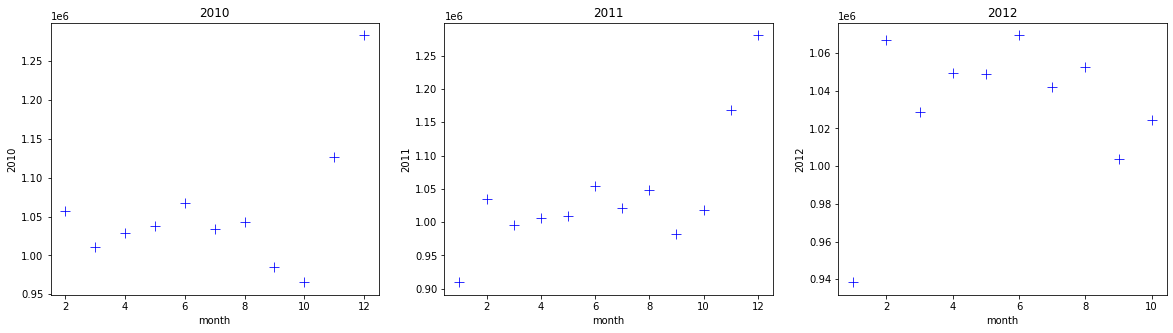

In [37]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title("2010")
sns.scatterplot(data=pivot_data[2010],marker="+",color="blue",s=100)


plt.subplot(1,3,2)
plt.title("2011")
sns.scatterplot(data=pivot_data[2011],marker="+",color="blue",s=100)

plt.subplot(1,3,3)
plt.title("2012")
sns.scatterplot(data=pivot_data[2012],marker="+",color="blue",s=100)

- So above we can see that Sales in **2012** are much higher and starting to increasing.

- But problem is sales in last 2 months because we dont have anydata to compare with months in 2010 and 2011.

- So i did some reserach that why 2 months data is missing in 2012 and i find out that in November and December **Walmart hit by Black Friday strikes across 46 states** 

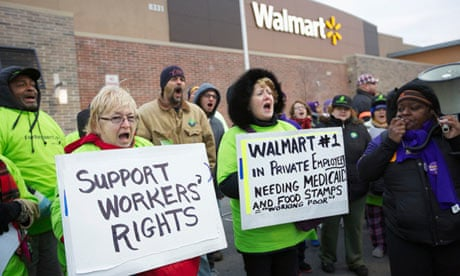




In 2012, the United Food & Commercial Workers joined with several Walmart workers with a plan to go on strike on Black Friday at several stores nationwide in protest to low pay, an increase in health insurance premiums, and not being given the option to have the day off or having Thanksgiving off.


You can know more about this from here -> https://www.theguardian.com/business/2012/nov/23/walmart-black-friday-strikes-protesters

<AxesSubplot:xlabel='year', ylabel='Temperature'>

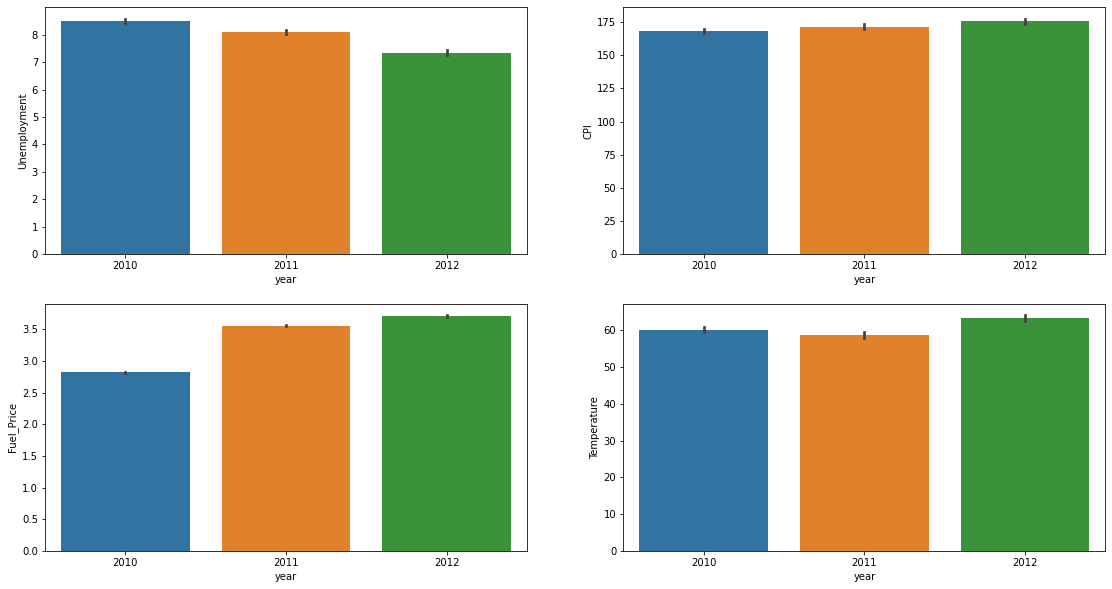

In [38]:
plt.figure(figsize=(19,10))

plt.subplot(2,2,1)
sns.barplot(data = data_frame,x="year",y="Unemployment")

plt.subplot(2,2,2)
sns.barplot(data = data_frame,x="year",y="CPI")

plt.subplot(2,2,3)
sns.barplot(data = data_frame,x="year",y="Fuel_Price")

plt.subplot(2,2,4)
sns.barplot(data = data_frame,x="year",y="Temperature")

In [39]:
data_frame.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,holiday_event
0,1,5,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,no event
1,1,12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,Super Bowl
2,1,19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,no event
3,1,26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,no event
4,1,5,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,no event


Text(0, 0.5, 'Temperature')

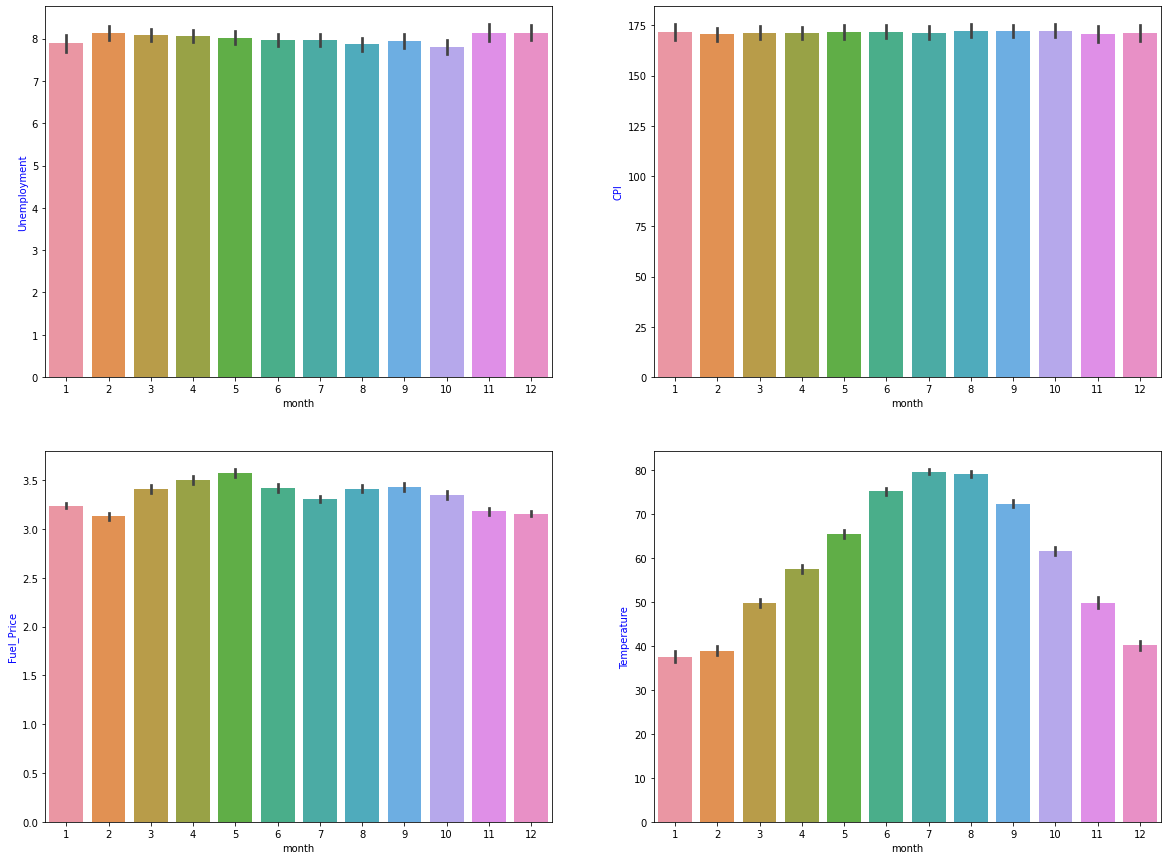

In [40]:
plt.figure(figsize=(20,15))


plt.subplot(2,2,1)
sns.barplot(data = data_frame,x="month",y="Unemployment")
plt.ylabel("Unemployment",color="Blue")


plt.subplot(2,2,2)
sns.barplot(data = data_frame,x="month",y="CPI")
plt.ylabel("CPI",color="Blue")

plt.subplot(2,2,3)
sns.barplot(data = data_frame,x="month",y="Fuel_Price")
plt.ylabel("Fuel_Price",color="Blue")

plt.subplot(2,2,4)
sns.barplot(data = data_frame,x="month",y="Temperature")
plt.ylabel("Temperature",color="Blue")

Until now we findout that :-

- Which store has maximum sales.

- Which store has maximum standard deviation.

- Which store/s has good quarterly growth rate in Q3’2012.

- holidays which have higher sales than the mean sales in non-holiday season   for all stores together.

- monthly and semester view of sales in units and give insights.

- and many more information.

# **Build  prediction models to forecast demand**



### <center> **Data pre-proccesing**

In [41]:
data_frame.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,holiday_event
0,1,5,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,no event
1,1,12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,Super Bowl
2,1,19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,no event
3,1,26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,no event
4,1,5,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,no event


In [42]:
data_frame.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,holiday_event
6430,45,28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,no event
6431,45,5,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,no event
6432,45,12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,no event
6433,45,19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,no event
6434,45,26,760281.43,0,58.85,3.882,192.308899,8.667,10,2012,no event


In [43]:
data_frame.info

<bound method DataFrame.info of       Store  Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1     5    1643690.90             0        42.31       2.572   
1         1    12    1641957.44             1        38.51       2.548   
2         1    19    1611968.17             0        39.93       2.514   
3         1    26    1409727.59             0        46.63       2.561   
4         1     5    1554806.68             0        46.50       2.625   
...     ...   ...           ...           ...          ...         ...   
6430     45    28     713173.95             0        64.88       3.997   
6431     45     5     733455.07             0        64.89       3.985   
6432     45    12     734464.36             0        54.47       4.000   
6433     45    19     718125.53             0        56.47       3.969   
6434     45    26     760281.43             0        58.85       3.882   

             CPI  Unemployment  month  year holiday_event  
0     211.096358   

In [44]:
data_frame.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
count,6435.000000,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,15.678322,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,6.447552,2010.965035
std,12.988182,8.755780,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,3.238308,0.797019
min,1.000000,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,2010.000000
25%,12.000000,8.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,2010.000000
50%,23.000000,16.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,6.000000,2011.000000
75%,34.000000,23.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,9.000000,2012.000000
max,45.000000,31.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,12.000000,2012.000000


**Checking for null values inside dataset**

In [45]:
data_frame.isnull().sum()

Store            0
Date             0
Weekly_Sales     0
Holiday_Flag     0
Temperature      0
Fuel_Price       0
CPI              0
Unemployment     0
month            0
year             0
holiday_event    0
dtype: int64

we can see that column "holiday_event" have string values and for model we need integer values only! so now we need to do 
**data encoding**

### <center> **Data Encoding**

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame["holiday_event"] = le.fit_transform(data_frame["holiday_event"])

In [47]:
data_frame.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,holiday_event
0,1,5,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,4
1,1,12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,2
2,1,19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,4
3,1,26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,4
4,1,5,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,4


### <center> **Solving Multi collinearity**

<AxesSubplot:>

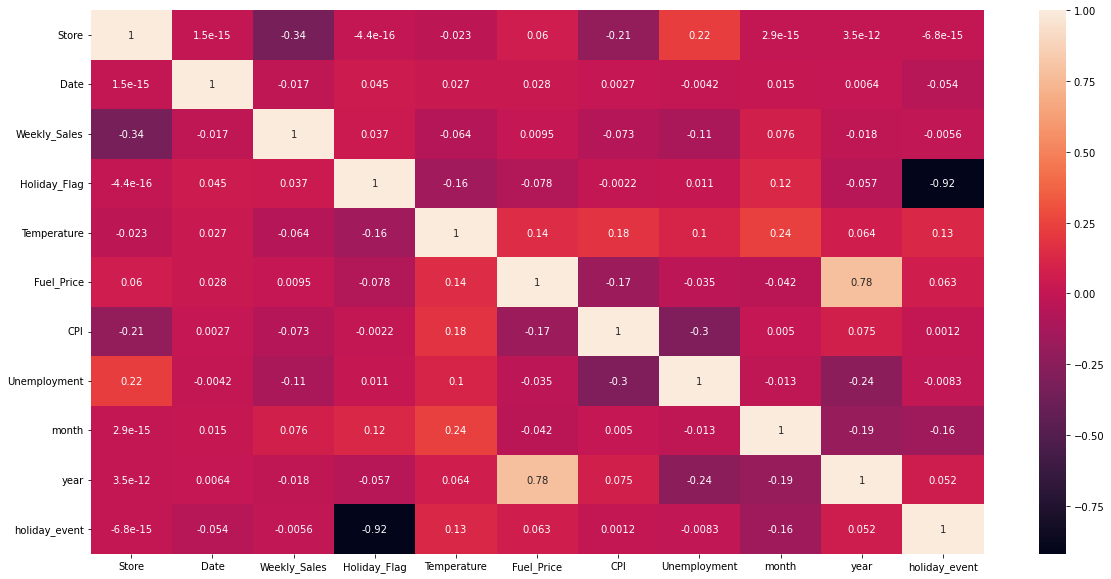

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(data_frame.corr(),annot=True)

above the column **"year"** and **"Fuel_Price"** have high collinearity so we will drop one of them.

In [49]:
data_frame = data_frame.drop(["year"],axis=1)
data_frame.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,holiday_event
0,1,5,1643690.90,0,42.31,2.572,211.096358,8.106,2,4
1,1,12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2
2,1,19,1611968.17,0,39.93,2.514,211.289143,8.106,2,4
3,1,26,1409727.59,0,46.63,2.561,211.319643,8.106,2,4
4,1,5,1554806.68,0,46.50,2.625,211.350143,8.106,3,4


In [50]:
data_frame = data_frame.drop(["Fuel_Price","holiday_event"],axis=1)
data_frame.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment,month
0,1,5,1643690.90,0,42.31,211.096358,8.106,2
1,1,12,1641957.44,1,38.51,211.242170,8.106,2
2,1,19,1611968.17,0,39.93,211.289143,8.106,2
3,1,26,1409727.59,0,46.63,211.319643,8.106,2
4,1,5,1554806.68,0,46.50,211.350143,8.106,3


### <center> **Feature Scaling**

In [51]:
scaled_data_frame = (data_frame.mean() - data_frame) / data_frame.std()

In [52]:
scaled_data_frame.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment,month
0,1.693847,1.219574,-1.057338,0.274183,0.995058,-1.004097,-0.056959,1.373418
1,1.693847,0.420102,-1.054266,-3.646633,1.201077,-1.007802,-0.056959,1.373418
2,1.693847,-0.379370,-1.001128,0.274183,1.124091,-1.008996,-0.056959,1.373418
3,1.693847,-1.178842,-0.642778,0.274183,0.760848,-1.009771,-0.056959,1.373418
4,1.693847,1.219574,-0.899844,0.274183,0.767896,-1.010546,-0.056959,1.064615


In [53]:
scaled_data_frame.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment,month
6430,-1.693847,-1.407262,0.591443,0.274183,-0.228584,-0.519229,-0.365080,-0.788204
6431,-1.693847,1.219574,0.555507,0.274183,-0.229126,-0.523215,-0.356018,-1.097007
6432,-1.693847,0.420102,0.553719,0.274183,0.335799,-0.527200,-0.356018,-1.097007
6433,-1.693847,-0.379370,0.582670,0.274183,0.227368,-0.527292,-0.356018,-1.097007
6434,-1.693847,-1.178842,0.507974,0.274183,0.098335,-0.526734,-0.356018,-1.097007


### <center> **Splitting dataset into Dependent set and independent set**

In [54]:
X = scaled_data_frame.drop("Weekly_Sales",axis=1).values
y = data_frame["Weekly_Sales"].values

In [55]:
X[0:5]

array([[ 1.69384748,  1.21957402,  0.27418294,  0.99505824, -1.00409719,
        -0.05695923,  1.37341844],
       [ 1.69384748,  0.42010212, -3.64663313,  1.20107688, -1.00780207,
        -0.05695923,  1.37341844],
       [ 1.69384748, -0.37936978,  0.27418294,  1.12409097, -1.00899559,
        -0.05695923,  1.37341844],
       [ 1.69384748, -1.17884169,  0.27418294,  0.76084757, -1.00977055,
        -0.05695923,  1.37341844],
       [ 1.69384748,  1.21957402,  0.27418294,  0.76789558, -1.01054551,
        -0.05695923,  1.06461524]])

In [56]:
y[0:5]

array([1643690.9 , 1641957.44, 1611968.17, 1409727.59, 1554806.68])

### <center> **Splitting dataset into Training set and Testing set**

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [58]:
x_train.shape

(5148, 7)

In [59]:
x_test.shape

(1287, 7)

In [60]:
y_train.shape

(5148,)

In [61]:
y_test.shape

(1287,)

### <center> **Making Prediction model using RandomForestRegressor**

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [64]:
y_pred = model.predict(x_test)

In [65]:
model.score(x_train,y_train)

0.9949974011089358

In [66]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9587467988534639

<AxesSubplot:ylabel='Density'>

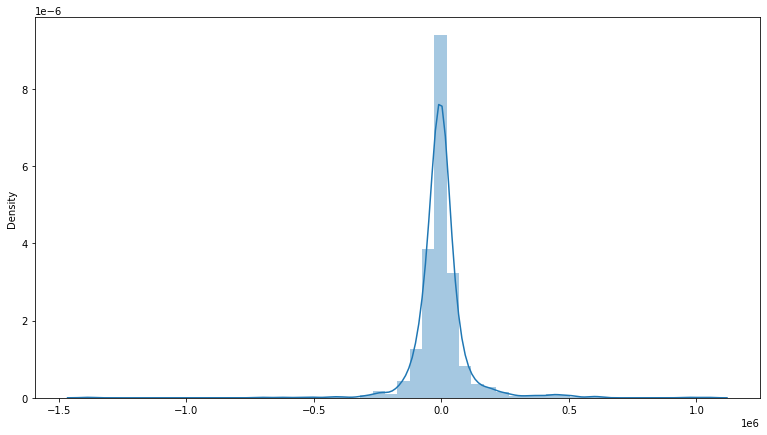

In [67]:
plt.figure(figsize=(13,7))
sns.distplot(y_test-y_pred)

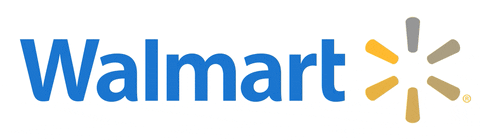 